In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Using TensorFlow backend.
/Users/madina/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/madina/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/madina/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/madina/opt/anaconda3/lib/python3.7

In [68]:
df = web.DataReader('TSLA', data_source = "yahoo", start = '2015-01-01', end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,45.136002,44.450001,44.618000,44.481998,11487500,44.481998
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000,42.189999
...,...,...,...,...,...,...
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996


In [69]:
#Get the number of rows and columns in the data set
df.shape

(1259, 6)

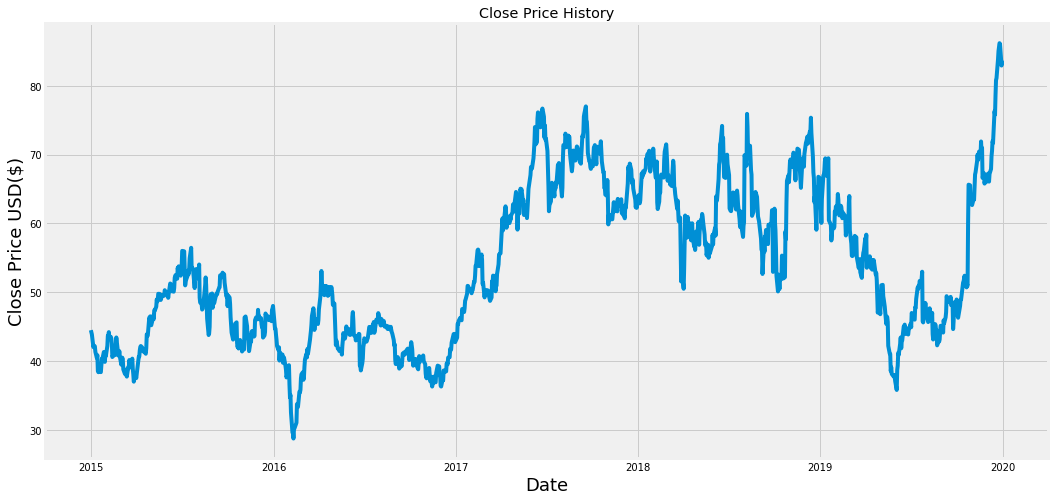

In [70]:
#Visulaize
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [71]:
#New DataFrame with only Close column
data = df.filter(['Close'])
#Convert the DataFrame to a numpy array
dataset = data.values
#Get the number of rows to train the model on
#ceil to round this up
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1008

In [72]:
#Scale the data - preprocessing data before it gets to neural network
scaler = MinMaxScaler(feature_range=(0, 1)) #values gonna be between 0 and 1
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.2740975 ],
       [0.26330628],
       [0.23121108],
       ...,
       [0.99805049],
       [0.9434678 ],
       [0.95610396]])

In [73]:
#Creating training data set
#Creating scaled training data set
train_data = scaled_data[0:training_data_len, :]#second param means gettig back all columns
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.2740975 , 0.26330628, 0.23121108, 0.2353535 , 0.23420473,
       0.23305602, 0.21927108, 0.20378044, 0.21088172, 0.17064083,
       0.16778641, 0.17196363, 0.16799529, 0.1841473 , 0.20172662,
       0.20057784, 0.21888817, 0.21690394, 0.19389425, 0.21418876,
       0.20861909, 0.23416994, 0.25999931, 0.26066068, 0.26915448,
       0.25651825, 0.25693595, 0.25279352, 0.24064471, 0.20611272,
       0.20921087, 0.21122983, 0.21161274, 0.23685033, 0.25564801,
       0.22163815, 0.21039438, 0.20917601, 0.22111601, 0.20771398,
       0.1867929 , 0.19455562, 0.20458104, 0.19828035, 0.17478332,
       0.16434015, 0.16239077, 0.17429598, 0.16500158, 0.15668187,
       0.1811188 , 0.17774218, 0.19855882, 0.18094477, 0.18940372,
       0.19479929, 0.20207473, 0.17624535, 0.16270409, 0.14387162])]
[0.1632610168264893]



In [74]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [75]:
# Reshaping the data to 3D. Rn our data is 2D
# x_train = np.reshape(x_train, (948, 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(948, 60, 1)

In [76]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [77]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [78]:
#Train the model || fit
#epochs are the number of iterations when the data set is passed forw&back through neural network
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
948/948 [==============================] - 88s 93ms/step - loss: 0.0051


In [84]:
#Creating testing data set
#New array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [85]:
#Converting data to a numpy array so we can use it in LSTM model
x_test = np.array(x_test)


In [86]:
#Reshaping data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [87]:
#Get the models predicted price values
predictions = model.predict(x_test)
#we want predictions to contain the same values as our y_test data set based on x_test
predictions = scaler.inverse_transform(predictions)

In [88]:
#Evaluating our data by getting RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
# rmse

/Users/madina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


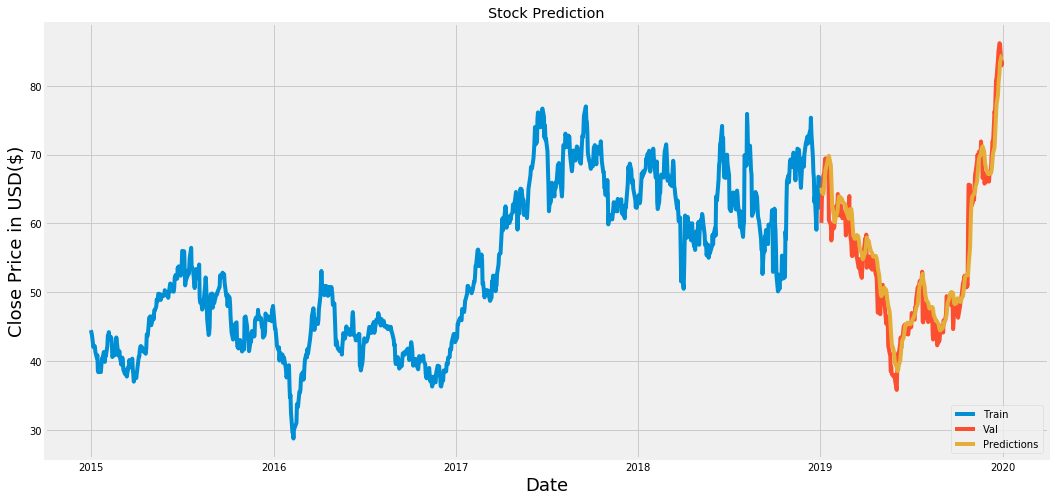

In [89]:
#Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Stock Prediction')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [90]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-01-03,60.071999,65.195808
2019-01-04,63.537998,64.504852
2019-01-07,66.991997,64.266853
2019-01-08,67.070000,64.838989
2019-01-09,67.706001,65.671211
...,...,...
2019-12-24,85.050003,80.383308
2019-12-26,86.188004,81.944000
2019-12-27,86.075996,83.355293


In [91]:
#Now predicting price for the upcoming day
stock = web.DataReader('TSLA', data_source = "yahoo", start = '2015-01-01', end = '2020-01-01')
#new DF
new_df = stock.filter(['Close'])
#Get the last 60 days; convert df to an array
last60 = new_df[-60:].values
#Scaling the data between 0 and 1
last60_scaled = scaler.transform(last60)
#Empty list
X_test = []
#Appending last 60 days
X_test.append(last60_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
predicted_price = model.predict(X_test)
#undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[84.181404]]


In [92]:
stock_checker = web.DataReader('TSLA', data_source = "yahoo", start = '2020-01-02', end = '2020-01-02')
print(stock_checker['Close'])

Date
2020-01-02    86.052002
Name: Close, dtype: float64
